In [1]:
import numpy as np 
import  matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs

dimension de X: (100, 2)
dimension de y: (100, 1)


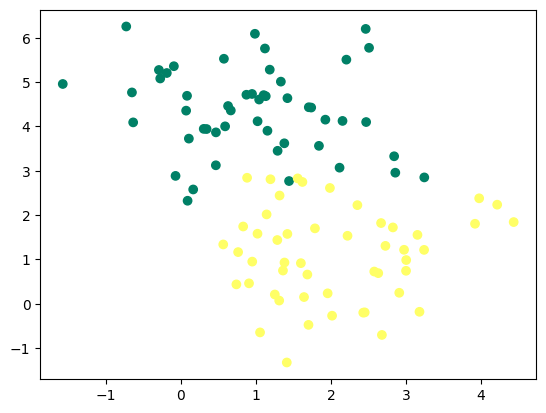

In [2]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0], 1))

print('dimension de X:', X.shape)
print('dimension de y:', y.shape)

plt.scatter(X[:,0], X[:,1], c=y, cmap='summer')
plt.show()

In [3]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return(W, b)

In [4]:
def model(X, W, b):
    Z = X.dot(W) + b
    A = 1 / (1 + np.exp(-Z))
    return A
    

In [24]:
def log_loss(A, y):
    epsilon = 1e-15
    return 1 / len(y) * np.sum( -y * np.log(A + epsilon) - (1-y) * np.log(1 - A + epsilon))

In [6]:
def gradients(A, X, y):
    dW = 1 / len(y) * np.dot(X.T, A - y)
    db = 1 / len(y) * sum(A - y)
    return(dW, db)

In [7]:
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate *db
    return(W, b)

In [8]:
def predict(X, W, b):
    A = model(X, W, b)
    print(A)
    return A >= 0.5

In [9]:
def predict(X, W, b):
    A = model(X, W, b)
    return A >= 0.5

In [10]:
from sklearn.metrics import accuracy_score

In [34]:
from tqdm import tqdm

In [47]:
def artificial_neuron(X_train, y_train, X_test, y_test, learning_rate = 0.01, n_iter = 100):
    #initialisation
    W, b = initialisation(X_train)

    train_loss = []
    test_loss = []
    train_acc = []
    test_acc = []


    for i in tqdm(range(n_iter)): 
        A = model(X_train, W, b)

        if i %10 == 0: 
            #Train
            train_loss.append(log_loss(A, y_train))
            y_pred = predict(X_train, W, b)
            train_acc.append(accuracy_score(y_train, y_pred))

            #Test
            A_test = model(X_test, W, b)
            test_loss.append(log_loss(A_test, y_test))
            y_pred = predict(X_test, W, b)
            test_acc.append(accuracy_score(y_test, y_pred))



        dW, db = gradients(A, X_train, y_train)
        W, b = update(dW, db, W, b, learning_rate)

    
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label= 'train_loss')
    plt.plot(test_loss, label= 'test_loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label= 'train_acc')
    plt.plot(test_acc, label= 'test_acc')
    plt.legend()
    plt.show()

    return(W, b)

0.92


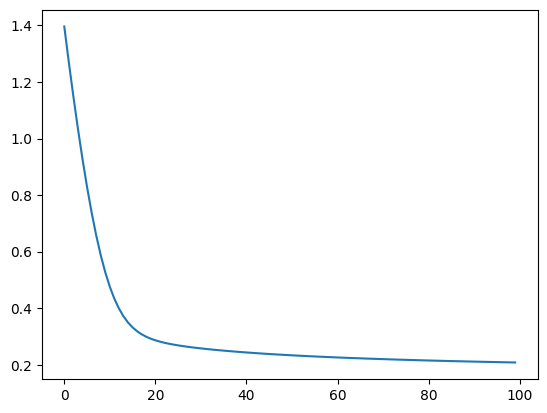

In [12]:
W, b = artificial_neuron(X, y)

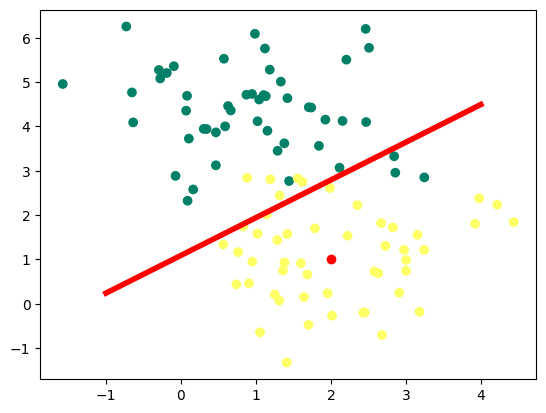

array([ True])

In [13]:
new_plant = np.array([2, 1])

x0 = np.linspace(-1, 4, 100)
x1 = (-W[0] * x0 - b)/ W[1]
plt.scatter(X[:,0], X[:,1], c=y, cmap='summer')
plt.scatter(new_plant[0], new_plant[1], c='r')
plt.plot(x0, x1, c = 'r', lw=4)
plt.show()
predict(new_plant, W, b)

CHAT VS CHIEN 

In [14]:
from utilities import *

In [49]:
X_train, y_train, X_test, y_test = load_data()

In [17]:
print(X_test.shape)
print(y_test.shape)
print(np.unique(y_test, return_counts=True))

(200, 64, 64)
(200, 1)
(array([0., 1.]), array([100, 100]))


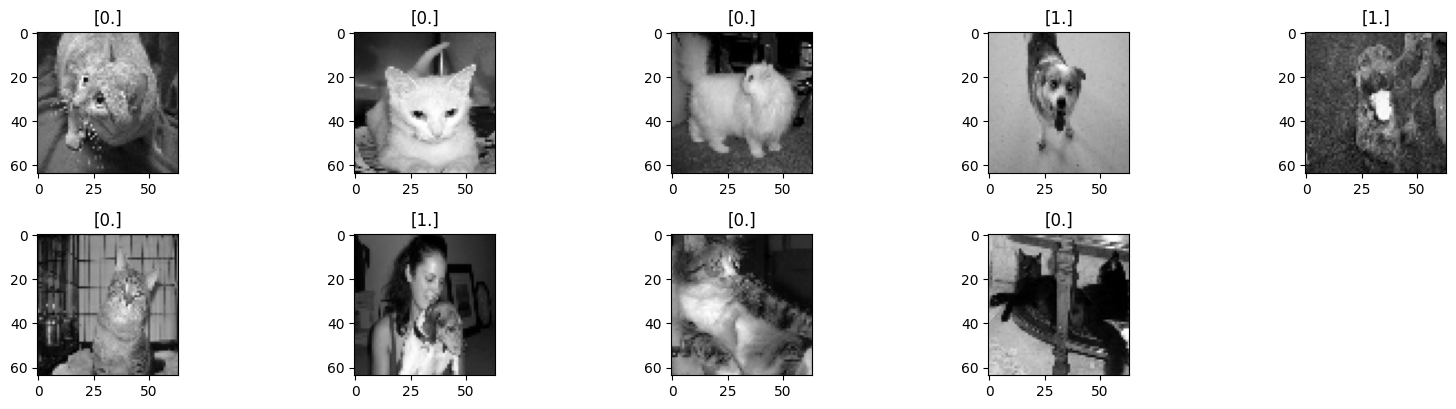

In [18]:
plt.figure(figsize=(16, 8))
for i in range(1, 10):
    plt.subplot(4, 5, i)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(y_train[i])
    plt.tight_layout()
plt.show()


In [26]:
X_train_reshape = X_train.reshape(X_train.shape[0], -1) / X_train.max()
X_train_reshape.max()

np.float64(1.0)

In [27]:
X_test_reshape = X_test.reshape(X_test.shape[0], -1) / X_train.max()
X_test_reshape.max()

np.float64(1.0)

100%|██████████| 10000/10000 [00:25<00:00, 390.88it/s]


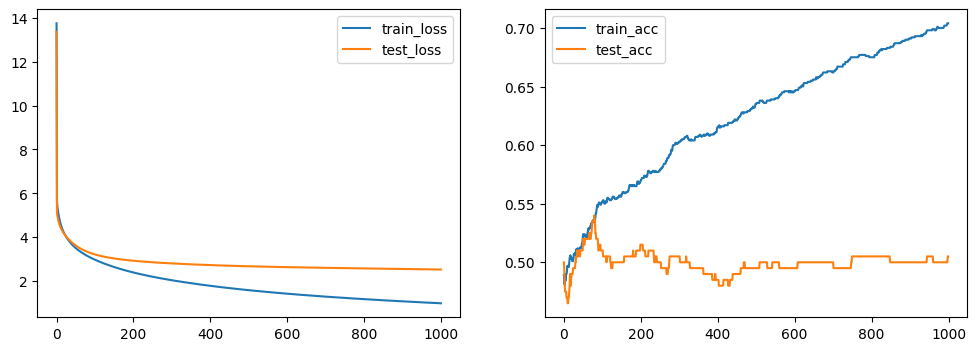

In [48]:
W, b = artificial_neuron(X_train_reshape, y_train, X_test_reshape, y_test, learning_rate = 0.01, n_iter= 10000)